<a href="https://colab.research.google.com/github/JeremyHugentobler/PatNet/blob/main/colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Clone the github repo
!git clone --recursive https://github.com/JeremyHugentobler/PatNet.git

# Change the current working directory to the src folder of the PatNet repo
import os
os.chdir("/content/PatNet")

# Setup script
!chmod +x install.sh && ./install.sh

Cloning into 'PatNet'...
remote: Enumerating objects: 162, done.
remote: Counting objects: 100% (162/162), done.
remote: Compressing objects: 100% (121/121), done.
remote: Total 162 (delta 71), reused 121 (delta 35), pack-reused 0 (from 0)
Receiving objects: 100% (162/162), 28.55 MiB | 38.68 MiB/s, done.
Resolving deltas: 100% (71/71), done.
Submodule 'src/dinov3' (https://github.com/facebookresearch/dinov3.git) registered for path 'src/dinov3'
Submodule 'src/sam3' (https://github.com/facebookresearch/sam3.git) registered for path 'src/sam3'
Cloning into '/content/PatNet/src/dinov3'...
remote: Enumerating objects: 538, done.        
remote: Counting objects: 100% (362/362), done.        
remote: Compressing objects: 100% (263/263), done.        
remote: Total 538 (delta 199), reused 99 (delta 99), pack-reused 176 (from 1)        
Receiving objects: 100% (538/538), 9.88 MiB | 26.29 MiB/s, done.
Resolving deltas: 100% (222/222), done.
Cloning into '/content/PatNet/src/sam3'...
remote: En

# Important
1. Restart the kernel using the "Execution" menu of Google Colab. This will load the just installed libraries in the environment.
2. Continue the execution (no need to do the first cell again) from here.
3. You will be prompted to login with Hugging Face. First you need to have access to the SAM3 model by requesting the permission [here](https://huggingface.co/facebook/sam3). Then, enter your HuggingFace Token in the GUI login and restart the cell to launch the pipeline.

In [2]:
import sys, os
sys.path.append('/content/sam3')
os.chdir("/content/PatNet")

from src.PatNet import compare_images
from main import check_huggingface_auth


# Check Hugging Face authentication
if not check_huggingface_auth():
    # block execution until authenticated
    raise Exception("Please authenticate with Hugging Face and restart the runtime.")

# Image directory
images = ["images/image.jpg", "images/image2.jpg", "images/image3.jpg", "images/image4.jpg", "images/image5.jpg", "images/image6.jpg", "images/image7.jpg", "images/image8.jpg", "images/image9.jpg", "images/image10.jpg", "images/image11.jpg", "images/image12.jpg", "images/image13.jpg", "images/image14.jpg"]
# Check that the images exist
for img in images:
    assert os.path.exists(img), f"Image {img} does not exist."

matches = compare_images(images)


------------------------------------------------------------
Checking Hugging Face authentication... (needed to download SAM and Dino models, where you should request acess on huggingface)
[HuggingFace] Authenticated as jhugentobler


config.json:   0%|          | 0.00/25.8k [00:00<?, ?B/s]

sam3.pt:   0%|          | 0.00/3.45G [00:00<?, ?B/s]

Comparing images: 100%|██████████| 91/91 [05:27<00:00,  3.60s/it]


Matches found:
Match: images/image.jpg <--> images/image2.jpg with score 0.06232547258549522


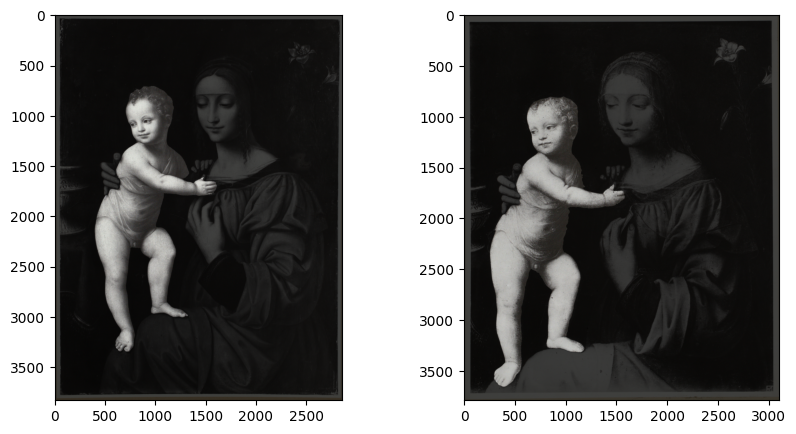

Match: images/image7.jpg <--> images/image8.jpg with score 0.10498246070334634


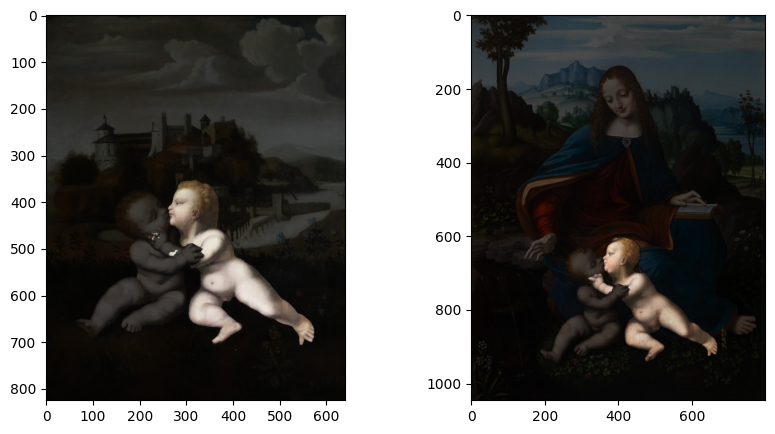

Match: images/image11.jpg <--> images/image12.jpg with score 0.11812162790249266


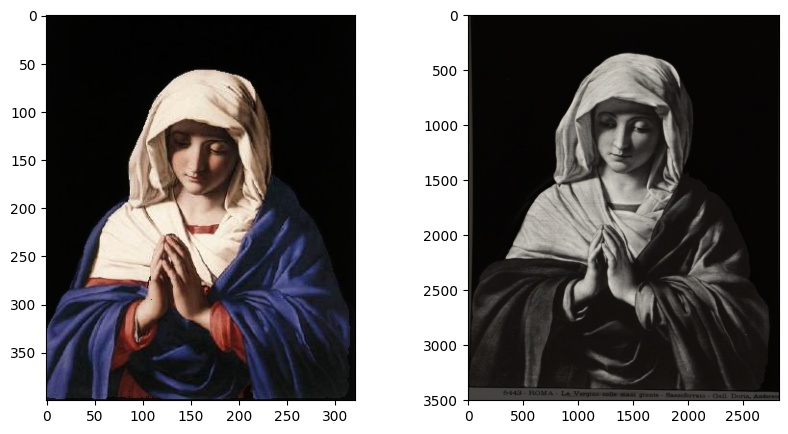

In [3]:
from src.segmentation import show_match

print("Matches found:")
for match in matches:
    path1, path2, score, img1, mask1, img2, mask2 = match
    print(f"Match: {path1} <--> {path2} with score {score}")
    show_match(img1, mask1, img2, mask2)
